In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from tqdm.auto import tqdm


/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
#train_file = "/workspaces/Wunder_Challenge/submission/datasets/train.csv"
import os
os.environ["PYARROW_IGNORE_EXTENSIONS"] = "1"
import pandas as pd
test_file_real = "/workspaces/Wunder_Challenge/competition_package/datasets/test.csv"
train_file = "/workspaces/Wunder_Challenge/competition_package/datasets/train.parquet"
#train_df = pd.read_csv(train_file)

df = pd.read_parquet(train_file)


In [22]:
grouped = df.groupby("seq_ix")
all_cov_mat = np.zeros((32,32))
all_corr_mat = np.zeros((32,32))
for _, group in tqdm(grouped):
    df = group.drop(columns=['seq_ix','step_in_seq', 'need_prediction'])
    cov_matrix = df.cov()
    corr_matrix = df.corr()
    all_cov_mat += cov_matrix
    all_corr_mat += corr_matrix
all_cov_mat /= len(grouped)
all_corr_mat /= len(grouped)


  0%|          | 0/517 [00:00<?, ?it/s]

100%|██████████| 517/517 [00:02<00:00, 257.64it/s]


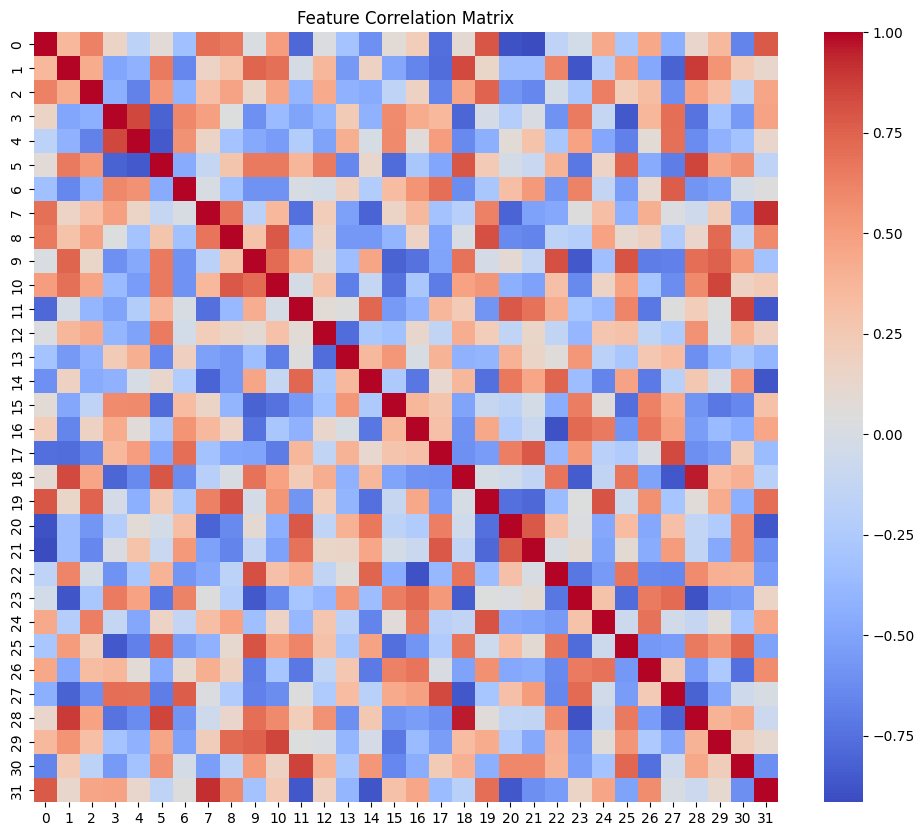

[(np.int64(0), np.int64(20)),
 (np.int64(0), np.int64(21)),
 (np.int64(1), np.int64(23)),
 (np.int64(1), np.int64(28)),
 (np.int64(3), np.int64(25)),
 (np.int64(4), np.int64(5)),
 (np.int64(5), np.int64(28)),
 (np.int64(7), np.int64(31)),
 (np.int64(9), np.int64(23)),
 (np.int64(10), np.int64(29)),
 (np.int64(11), np.int64(30)),
 (np.int64(11), np.int64(31)),
 (np.int64(14), np.int64(31)),
 (np.int64(16), np.int64(22)),
 (np.int64(18), np.int64(27)),
 (np.int64(18), np.int64(28)),
 (np.int64(20), np.int64(31)),
 (np.int64(23), np.int64(28))]

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(all_corr_mat, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()
#print(corr_matrix.head())
def coords_above_threshold_symmetric(matrix, threshold):
    # Get all coordinates above threshold
    coords = np.argwhere(np.abs(matrix) > threshold)
    
    # Filter out reversed duplicates (only keep upper triangle, excluding diagonal)
    filtered = [(i, j) for i, j in coords if i < j]
    
    return filtered
coords_above_threshold_symmetric(all_corr_mat, 0.85)

In [10]:
test_file_real = "/workspaces/Wunder_Challenge/competition_package/datasets/test.csv"
train_df = pd.read_csv(test_file_real)
train_df = train_df.drop(columns=['seq_ix','step_in_seq', 'need_prediction'])
train_arr = np.array(train_df)

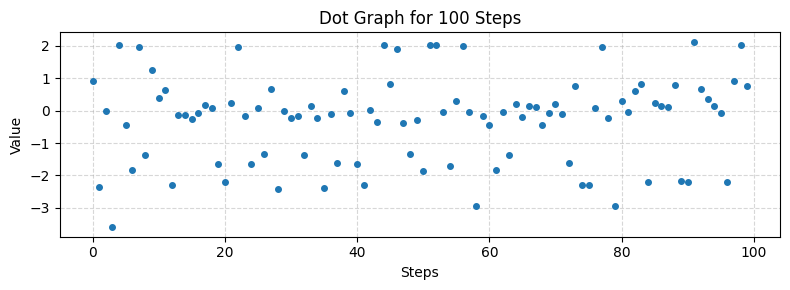

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dots(vector, title="Dot Graph", xlabel="Steps", ylabel="Value"):
    """
    Plot a dot graph for a 1D numpy array (n_steps,)
    """
    vector = np.asarray(vector).ravel()
    n_steps = len(vector)
    plt.figure(figsize=(8, 3))
    plt.plot(np.arange(n_steps), vector, linestyle='None', marker='o', markersize=4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Example usage:
y = np.random.randn(100)
plot_dots(train_arr[0:100,16], title="Dot Graph for 100 Steps")

In [13]:
test_dataset = TimeSeriesDataset(test_df)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
for epoch in range(5):
    for inputs, targets in test_loader:
        print(targets.shape)

torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([8, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([8, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([8, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([8, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([8, 32])
